In [1]:
import time
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.externals import joblib
from sklearn.preprocessing import QuantileTransformer
from sklearn import model_selection
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn import linear_model
from sklearn import ensemble

Load prices and TF-IDF vectorized features

In [2]:
prices = joblib.load('../prices_250.pkl')
features = joblib.load('../tfidf_vectorized_features_250.pkl')

Transform prices and views

In [3]:
quantile_transformer = QuantileTransformer(output_distribution='normal').fit(prices.reshape(-1,1))
quantile_prices = quantile_transformer.transform(prices.reshape(-1,1))
quantile_prices = quantile_prices.reshape(1,-1)[0]

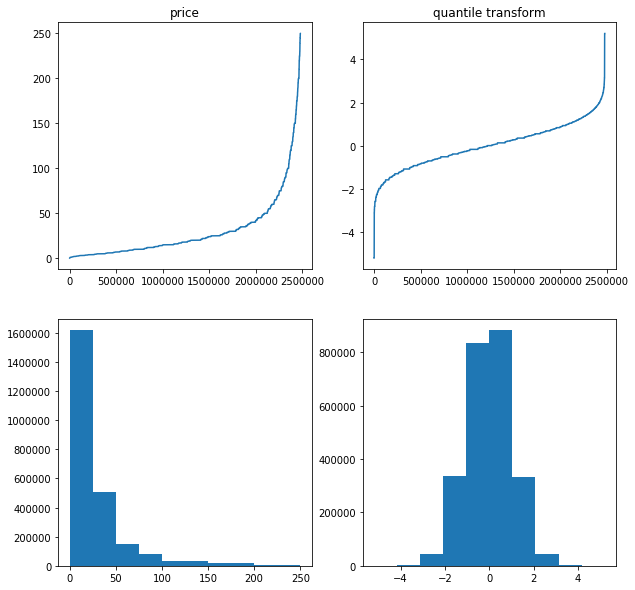

In [4]:
fig, ((ax0, ax1),(ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
ax0.plot(sorted(prices))
ax0.set_title('price')
ax2.hist(prices)

ax1.plot(sorted(quantile_prices))
ax1.set_title('quantile transform')
ax3.hist(quantile_prices)

plt.show()

Final Price Regressor

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, quantile_prices, test_size = 0.2, random_state = 0, shuffle=True)
estimator = ensemble.GradientBoostingRegressor(n_estimators=500, max_depth=20, random_state=0, verbose=1)

In [8]:
estimator.fit(X_train, y_train)
joblib.dump(estimator, "FINAL_price_estimator.pkl")

      Iter       Train Loss   Remaining Time 
         1           0.9384         3696.40m
         2           0.8803         3856.65m
         3           0.8288         3941.89m
         4           0.7883         4004.50m
         5           0.7534         4017.77m
         6           0.7233         4069.94m
         7           0.6950         4089.94m
         8           0.6728         4054.05m
         9           0.6520         4033.64m
        10           0.6348         3975.59m
        20           0.5230         3421.71m
        30           0.4659         3026.26m
        40           0.4308         2715.17m
        50           0.4069         2477.61m
        60           0.3894         2281.12m
        70           0.3747         2123.92m
        80           0.3630         1992.72m
        90           0.3523         1882.44m
       100           0.3439         1779.48m
       200           0.2927         1110.60m
       300           0.2669          674.99m
       40

['FINAL_price_estimator.pkl']